# Sample unsupervised segmentation on Color images

apllying the segmentation pipe line with default parameters on samle images

In [1]:
%matplotlib inline
import os, sys, glob, time
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
sys.path += [os.path.abspath('.'), os.path.abspath('..')] # Add path to root
import segmentation.utils.data_io as tl_data
import segmentation.pipelines as segm_pipe

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Load image

['stars_nb2.jpg', 'stars_nb3.jpg', 'star_nb1-a.jpg', 'star_nb1-b.jpg', 'star_nb1-c.jpg']


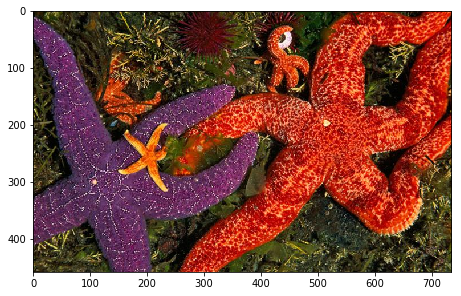

In [2]:
path_dir = tl_data.update_path(os.path.join('images', 'see_starfish'))
print ([os.path.basename(p) for p in glob.glob(os.path.join(path_dir, '*.jpg'))])
path_img = os.path.join(path_dir, 'stars_nb2.jpg')

img = np.array(Image.open(path_img))

FIG_SIZE = (12. * np.array(img.shape[:2]) / np.max(img.shape))
_= plt.figure(figsize=FIG_SIZE), plt.imshow(img)

## Segment Image

In [3]:
nb_classes = 3
clr_space = 'rgb'
sp_size = 25
sp_regul = 0.2
dict_features = {'color': ['mean', 'std', 'median']}

In [4]:
scaler, pca, model = segm_pipe.estim_model_classes_group([img], nb_classes, clr_space, sp_size, sp_regul, 
                                                         dict_features=dict_features, pca_coef=None, proba_type='GMM')

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)


/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWar

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
dict_debug = {}
seg = segm_pipe.segment_color2d_slic_features_model_graphcut(img, scaler, pca, model, clr_space,  sp_size, sp_regul, 
                     dict_features=dict_features, gc_regul=5., gc_edge_type='color', dict_debug_imgs=dict_debug)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


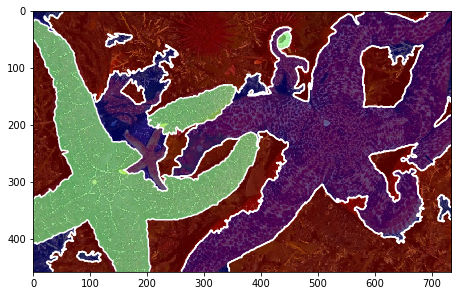

In [6]:
fig = plt.figure(figsize=FIG_SIZE)
plt.imshow(img)
plt.imshow(seg, alpha=0.6, cmap=plt.cm.jet)
plt.contour(seg, levels=np.unique(seg), colors='w')

## Visualise

['imgs_unary_cost', 'slic', 'slic_mean', 'edge_weights', 'segments', 'img', 'edges', 'img_graph_edges', 'img_graph_segm']


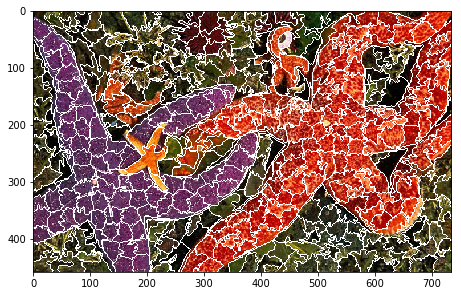

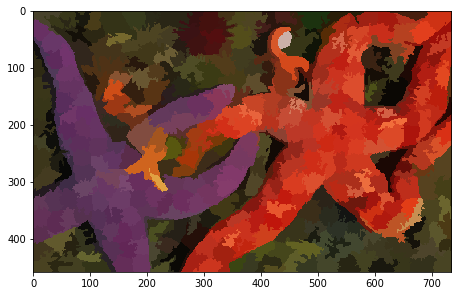

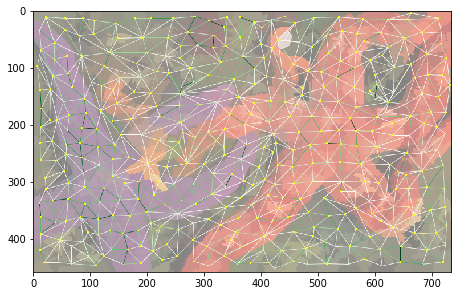

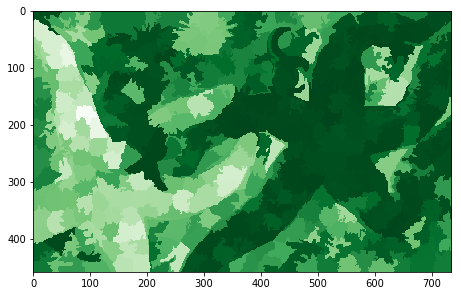

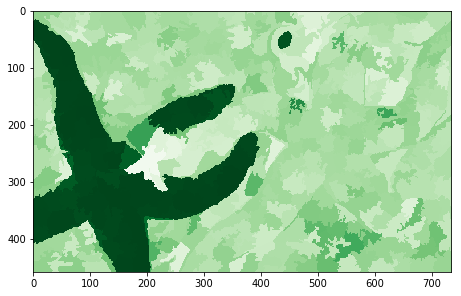

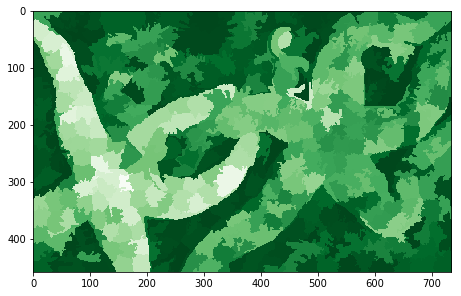

In [7]:
print ('debug fields:', dict_debug.keys())
_= plt.figure(figsize=FIG_SIZE), plt.imshow(mark_boundaries(img, dict_debug['slic'], color=(1, 1, 1)))
_= plt.figure(figsize=FIG_SIZE), plt.imshow(dict_debug['slic_mean'])
_= plt.figure(figsize=FIG_SIZE), plt.imshow(dict_debug['img_graph_edges'])
for im_u in dict_debug['imgs_unary_cost']:
    _= plt.figure(figsize=FIG_SIZE), plt.imshow(im_u)
# plt.figure(), plt.imshow(dict_debug['img_graph_segm'])